### Titanic Survival Analysis

The sinking of the Titanic is one of the most infamous shipwrecks in history.

On April 15, 1912, during her maiden voyage, the widely considered “unsinkable” RMS Titanic sank after colliding with an iceberg. Unfortunately, there weren’t enough lifeboats for everyone onboard, resulting in the death of 1502 out of 2224 passengers and crew.

While there was some element of luck involved in surviving, it seems some groups of people were more likely to survive than others.

In this challenge, we ask you to build a predictive model that answers the question: “what sorts of people were more likely to survive?” using passenger data (ie name, age, gender, socio-economic class, etc).

### 1. Import relevant libraries 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()

### 2. Load the data

In [2]:
train = pd.read_csv('train (1).csv')
test= pd.read_csv('test (1).csv')

### 3. Exploratory Data Analysis

In [3]:
train.shape # to know how many rows and columns are there in our train data set.

(891, 12)

In [4]:
test.shape #to know how many rows and columns are there in our test data set

(418, 11)

In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


 (int64) - are numerical data 
 (object)- are categorical
 (float64)- are data with decimal
 
 In oder to do our machine learning we have to convert our categorical data into numerical form. we will do it in Feature  Engineering section.


In [6]:
train.isnull().sum() # to know missing datas 

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

We can see that our train data set has many missing data in 'Age' , 'Cabin' and few in 'Embarked' 

In [7]:
test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

We could see that the test data has missing data in 'Age' ,'Cabin' and 'Fare'.

In [8]:
train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [9]:
test.columns

Index(['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [10]:
train.describe() # gives us the descriptive statistics of our train data.

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [11]:
test.describe() #gives us the descriptive statistics of our test data.

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


The data available to us is already split into 'train' and 'test'. We will use the train data (its important features) to build our machine learning model, and use the tes data to see how well our model fits into the unseen data

The following are the variables in our data lets see each one by one.
1. Survival (0= NO , 1= Yes)
2. pclass( ticket class) -- 1= 1st , 2= 2nd, 3= 3rd class.
3. sex
4. age
5. sibsp (# of siblings / spouses aboard the Titanic)
6. parch (# of parents / children aboard the Titanic)
7. tickets (gives the ticket number)
8. fare
9. cabin
10. embarked Port of Embarkation(C = Cherbourg,Q = Queenstown,S = Southampton)
11. pclass: A proxy for socio-economic status (SES)
(This is important to remember and will come in handy for later analysis.)
1st = Upper
2nd = Middle
3rd = Lower

##### We will now look at the Relationship between our feature with our target.

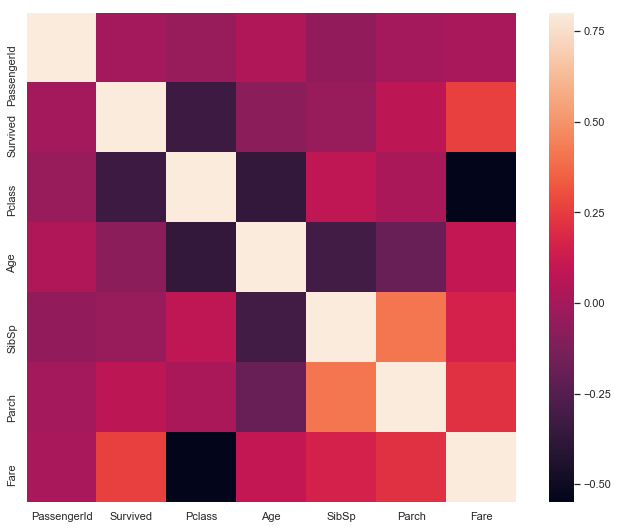

In [12]:
corrmat = train.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True);

We could see that Fare is higly correlated with the target(Survived).
And Pclass has relatively low correaltion with the targert(Survived).
Age , Sibsp also show low correlation. We could look at this again afte treating the missing values.

In [13]:
# We pass a function which can help us plot our graph by just using one line of code each time. 
def bar_chart(feature):
    survived=train[train['Survived']==1][feature].value_counts()
    dead =train[train['Survived']==0][feature].value_counts()
    df=pd.DataFrame([survived,dead])
    df.index=['Survived', 'Dead']
    df.plot(kind='bar', stacked=True,figsize=(10,5))

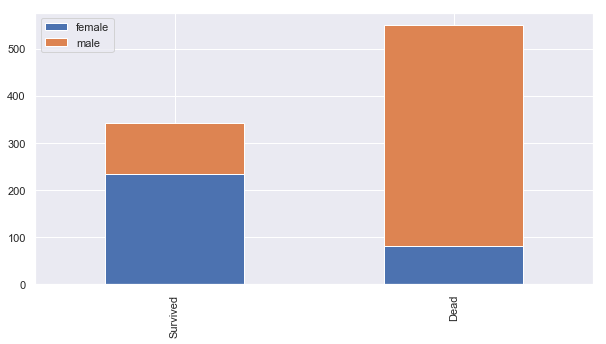

In [14]:
bar_chart('Sex')

we could see that more female Survived the Titanic incident.

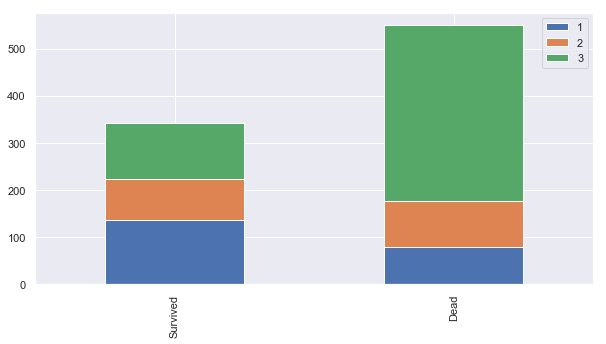

In [15]:
bar_chart('Pclass')

we could observe that more passengers from the first class survived

### 3. Feature Engineering

In [16]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


We can see that we have to fill our missing values and treat our categorical data. We will do it one by one. 

In [17]:
#PassengerId does not have any relation with the survived titanic passenger. 
#So, we will drop the passengerId from our train data.
train.drop(['PassengerId'], axis=1, inplace=True)


#### Name 

In [18]:
# let us see how many categories has our name column.
# First we will combine the test and the train data set to deal with missing and the categorical Variables.

train_test_data=[train,test]

for dataset in train_test_data:
    dataset['Title']= dataset['Name'].str.extract('([A-Za-z]+)\.', expand=False) # we create teh data frame named title and then map
    
train['Title'].value_counts()

Mr          517
Miss        182
Mrs         125
Master       40
Dr            7
Rev           6
Major         2
Mlle          2
Col           2
Sir           1
Mme           1
Jonkheer      1
Lady          1
Don           1
Capt          1
Ms            1
Countess      1
Name: Title, dtype: int64

we have so many categories but i will only keep Mr,Miss,Mrs,and others.
#### Title map
Mr:0
Miss:1
Mrs:2
other:3

In [19]:
title_mapping={'Mr':0,'Miss':1 , 'Mrs':2 , 'Master':3 ,'Dr':3, 'Rev':3,  
               'Mlle':3,'Major':3,'Col':3,'Mme':3,
               'Capt':3 ,  'Countess':3,  'Ms':3,  'Lady':3,
               'Jonkheer':3,'Sir':3, 'Don':3}

for dataset in train_test_data:
    dataset['Title']=dataset['Title'].map(title_mapping)

In [20]:
train.head(5)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,2
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,2
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0


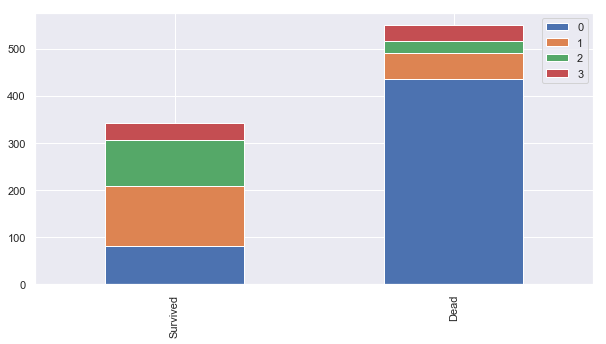

In [21]:
bar_chart('Title')

In [22]:
train.Title.isnull().sum()

0

In [23]:
test.Title.isnull().sum()

1

In [24]:
test.Title.tail()

413    0.0
414    NaN
415    0.0
416    0.0
417    3.0
Name: Title, dtype: float64

In [25]:
test['Title']=test['Title'].fillna(0)

In [26]:
test.Title.isnull().sum()

0

We can now see that Miss survied the most. 

In [27]:
# delete the name column
train.drop('Name', axis=1, inplace=True)
test.drop('Name', axis=1, inplace=True)

In [28]:
train.head(5)

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,0,3,male,22.0,1,0,A/5 21171,7.2500,NaN,S,0
1,1,1,female,38.0,1,0,PC 17599,71.2833,C85,C,2
2,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,1,1,female,35.0,1,0,113803,53.1000,C123,S,2
4,0,3,male,35.0,0,0,373450,8.0500,NaN,S,0


In [29]:
test.head(5)

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,892,3,male,34.5,0,0,330911,7.8292,NaN,Q,0.0
1,893,3,female,47.0,1,0,363272,7.0000,NaN,S,2.0
2,894,2,male,62.0,0,0,240276,9.6875,NaN,Q,0.0
3,895,3,male,27.0,0,0,315154,8.6625,NaN,S,0.0
4,896,3,female,22.0,1,1,3101298,12.2875,NaN,S,2.0


#### Sex

In [30]:
# We have only two categories in sex column
sex_mapping= {'male': 0 , 'female': 1}

for dataset in train_test_data:
    dataset['Sex']=dataset['Sex'].map(sex_mapping)

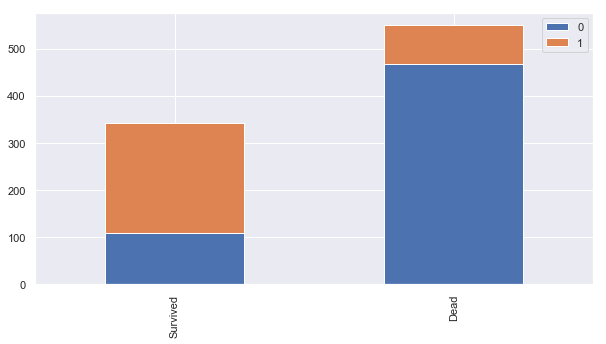

In [31]:
bar_chart('Sex') # female survived the most.

#### Age

In [32]:
# Since age was missing we will first fill the missing value according to the group of passneger.

train['Age'].fillna(train.groupby('Title')['Age'].transform('median'), inplace=True)
test['Age'].fillna(train.groupby('Title')['Age'].transform('median'), inplace=True)

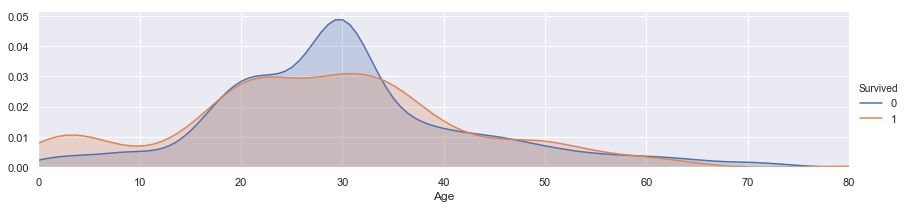

In [33]:
facet=sns.FacetGrid(train,hue='Survived', aspect=4)
facet.map(sns.kdeplot, 'Age', shade=True)
facet.set(xlim=(0,train['Age'].max()))
facet.add_legend()
plt.show()

(0, 20)

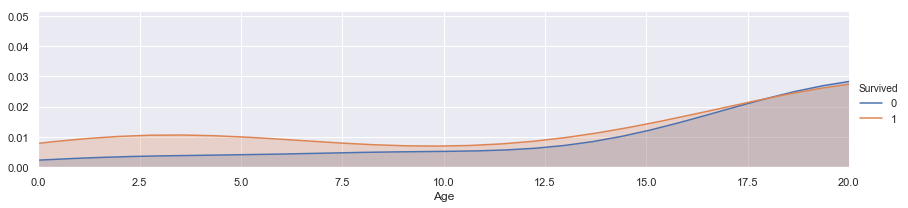

In [34]:
facet = sns.FacetGrid(train, hue="Survived",aspect=4)
facet.map(sns.kdeplot,'Age',shade= True)
facet.set(xlim=(0, train['Age'].max()))
facet.add_legend()
plt.xlim(0, 20)

(20, 30)

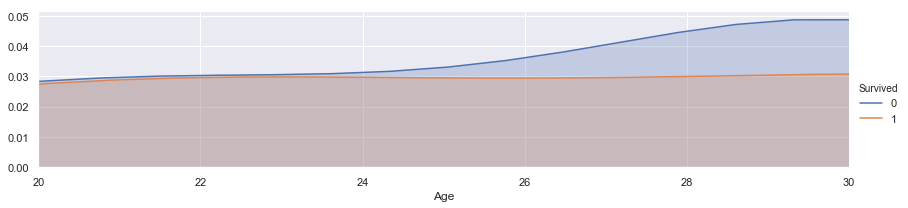

In [35]:
facet = sns.FacetGrid(train, hue="Survived",aspect=4)
facet.map(sns.kdeplot,'Age',shade= True)
facet.set(xlim=(0, train['Age'].max()))
facet.add_legend()
plt.xlim(20, 30)

We can easily figure out from the kdeplot that age of the people who survived varied. and we can see that people from 0 to 69 survived the most.

#### Bining Age 

Feature Vector map:
child =0 <=16
young:1 >= 16, <= 26
adult:2  (26-36)
mid_age:3 (36-62)
senior:4 >= 62

In [36]:
for dataset in train_test_data:
    dataset.loc[ dataset['Age'] <= 16, 'Age'] = 0,
    dataset.loc[(dataset['Age'] > 16) & (dataset['Age'] <= 26), 'Age'] = 1,
    dataset.loc[(dataset['Age'] > 26) & (dataset['Age'] <= 36), 'Age'] = 2,
    dataset.loc[(dataset['Age'] > 36) & (dataset['Age'] <= 62), 'Age'] = 3,
    dataset.loc[ dataset['Age'] > 62, 'Age'] = 4

In [37]:
train.head(10)

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,0,3,0,1.0,1,0,A/5 21171,7.2500,NaN,S,0
1,1,1,1,3.0,1,0,PC 17599,71.2833,C85,C,2
2,1,3,1,1.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,1,1,1,2.0,1,0,113803,53.1000,C123,S,2
4,0,3,0,2.0,0,0,373450,8.0500,NaN,S,0
5,0,3,0,2.0,0,0,330877,8.4583,NaN,Q,0
6,0,1,0,3.0,0,0,17463,51.8625,E46,S,0
7,0,3,0,0.0,3,1,349909,21.0750,NaN,S,3
8,1,3,1,2.0,0,2,347742,11.1333,NaN,S,2
9,1,2,1,0.0,1,0,237736,30.0708,NaN,C,2


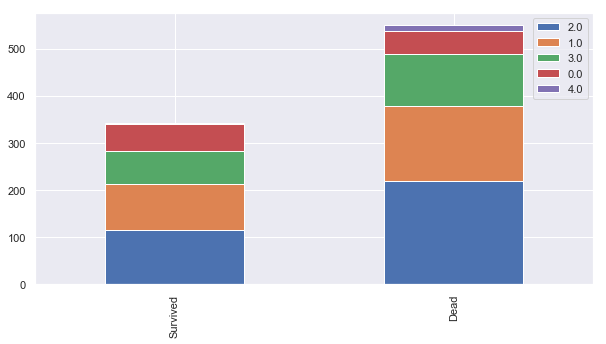

In [38]:
bar_chart('Age')

Remember in our inital Exploratory data analysis section Age was not that much correlated but after filling the null nad binning we could see that people between 26-36 died the most.

In [39]:
####Embarked

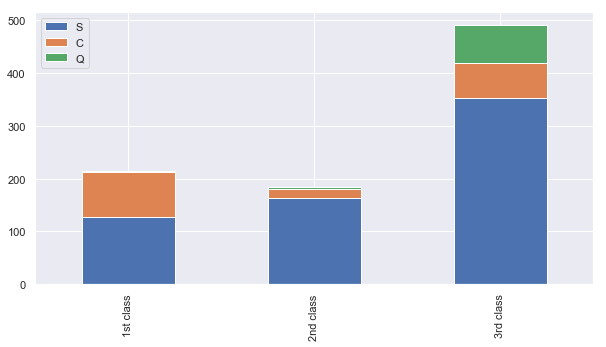

In [40]:
# We will fill the missing value according to the  pclass
# we will first create a new data frame 1st, 2nd, and 3rd pclass 
Pclass1 = train[train['Pclass']==1]['Embarked'].value_counts()
Pclass2 = train[train['Pclass']==2]['Embarked'].value_counts()
Pclass3 = train[train['Pclass']==3]['Embarked'].value_counts()
df = pd.DataFrame([Pclass1, Pclass2, Pclass3])
df.index = ['1st class','2nd class', '3rd class']
df.plot(kind='bar',stacked=True, figsize=(10,5))

In the firat class more was from S embark,
In the second class more than 50% was from S embark,
Similar is the case with third class.

So we will fill the missing value in Embark with S.

In [41]:
for dataset in train_test_data:
    dataset['Embarked']=dataset['Embarked'].fillna('S')

In [42]:
train.head(5)

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,0,3,0,1.0,1,0,A/5 21171,7.2500,NaN,S,0
1,1,1,1,3.0,1,0,PC 17599,71.2833,C85,C,2
2,1,3,1,1.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,1,1,1,2.0,1,0,113803,53.1000,C123,S,2
4,0,3,0,2.0,0,0,373450,8.0500,NaN,S,0


In [43]:
# Now mapp the embark column
embark_mappig={ 'S':0, 'C':1,'Q':2}
for dataset in train_test_data:
    dataset['Embarked'] = dataset['Embarked'].map(embark_mappig)
    

In [44]:
train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,0,3,0,1.0,1,0,A/5 21171,7.2500,NaN,0,0
1,1,1,1,3.0,1,0,PC 17599,71.2833,C85,1,2
2,1,3,1,1.0,0,0,STON/O2. 3101282,7.9250,NaN,0,1
3,1,1,1,2.0,1,0,113803,53.1000,C123,0,2
4,0,3,0,2.0,0,0,373450,8.0500,NaN,0,0


#### Fare

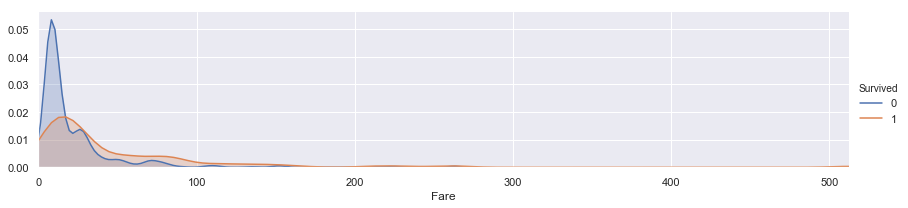

In [45]:
facet = sns.FacetGrid(train, hue="Survived",aspect=4)
facet.map(sns.kdeplot,'Fare',shade= True)
facet.set(xlim=(0, train['Fare'].max()))
facet.add_legend()
 
plt.show()

(0, 30)

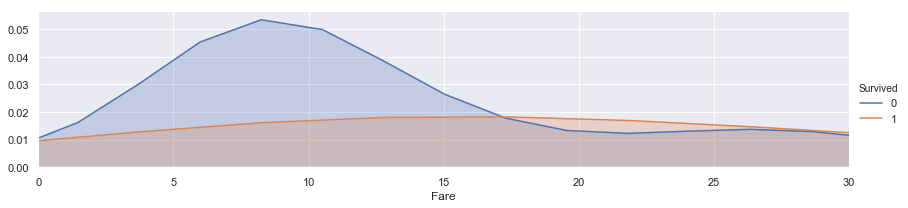

In [46]:
facet = sns.FacetGrid(train, hue="Survived",aspect=4)
facet.map(sns.kdeplot,'Fare',shade= True)
facet.set(xlim=(0, train['Fare'].max()))
facet.add_legend()
plt.xlim(0, 30)

(0, 512.3292)

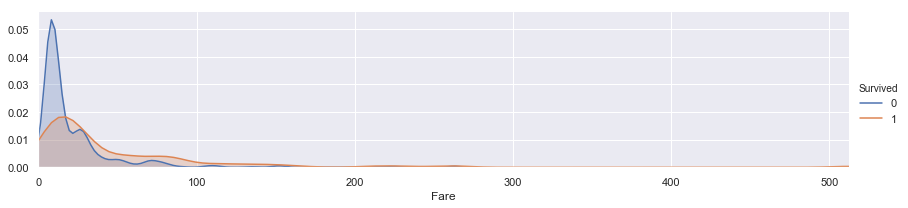

In [47]:
facet = sns.FacetGrid(train, hue="Survived",aspect=4)
facet.map(sns.kdeplot,'Fare',shade= True)
facet.set(xlim=(0, train['Fare'].max()))
facet.add_legend()
plt.xlim(0)

In [48]:
for dataset in train_test_data:
    dataset.loc[ dataset['Fare'] <= 17, 'Fare'] = 0,
    dataset.loc[(dataset['Fare'] > 17) & (dataset['Fare'] <= 30), 'Fare'] = 1,
    dataset.loc[(dataset['Fare'] > 30) & (dataset['Fare'] <= 100), 'Fare'] = 2,
    dataset.loc[ dataset['Fare'] > 100, 'Fare'] = 3

In [49]:
train.head(5)

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,0,3,0,1.0,1,0,A/5 21171,0.0,NaN,0,0
1,1,1,1,3.0,1,0,PC 17599,2.0,C85,1,2
2,1,3,1,1.0,0,0,STON/O2. 3101282,0.0,NaN,0,1
3,1,1,1,2.0,1,0,113803,2.0,C123,0,2
4,0,3,0,2.0,0,0,373450,0.0,NaN,0,0


In [50]:
# fill missing Fare with median fare for each Pclass
train["Fare"].fillna(train.groupby("Pclass")["Fare"].transform("median"), inplace=True)
test["Fare"].fillna(test.groupby("Pclass")["Fare"].transform("median"), inplace=True)
train.head(50)

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,0,3,0,1.0,1,0,A/5 21171,0.0,NaN,0,0
1,1,1,1,3.0,1,0,PC 17599,2.0,C85,1,2
2,1,3,1,1.0,0,0,STON/O2. 3101282,0.0,NaN,0,1
3,1,1,1,2.0,1,0,113803,2.0,C123,0,2
4,0,3,0,2.0,0,0,373450,0.0,NaN,0,0
5,0,3,0,2.0,0,0,330877,0.0,NaN,2,0
6,0,1,0,3.0,0,0,17463,2.0,E46,0,0
7,0,3,0,0.0,3,1,349909,1.0,NaN,0,3
8,1,3,1,2.0,0,2,347742,0.0,NaN,0,2
9,1,2,1,0.0,1,0,237736,2.0,NaN,1,2


In [51]:
train.Fare.isnull().sum()

0

In [52]:
test.Fare.isnull().sum()

0

#### Cabin

In [53]:
train.Cabin.value_counts()

B96 B98        4
C23 C25 C27    4
G6             4
F33            3
F2             3
C22 C26        3
E101           3
D              3
D26            2
C52            2
E25            2
B20            2
C2             2
D20            2
C92            2
F G73          2
D35            2
E8             2
B22            2
C124           2
C126           2
B18            2
B58 B60        2
B5             2
B28            2
B49            2
B51 B53 B55    2
D36            2
C125           2
C123           2
              ..
A24            1
A16            1
E34            1
B71            1
D30            1
B82 B84        1
C47            1
D6             1
B42            1
D45            1
D48            1
D7             1
C85            1
E36            1
E49            1
A32            1
C46            1
A14            1
D10 D12        1
C49            1
A19            1
E17            1
D47            1
C87            1
D50            1
D46            1
A23            1
A31           

In [54]:
for dataset in train_test_data:
    dataset['Cabin'] = dataset['Cabin'].str[:1]

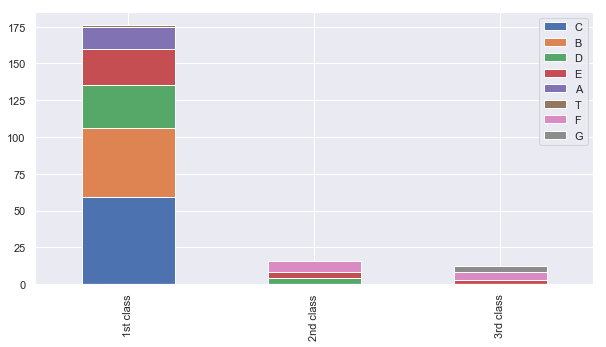

In [55]:
Pclass1 = train[train['Pclass']==1]['Cabin'].value_counts()
Pclass2 = train[train['Pclass']==2]['Cabin'].value_counts()
Pclass3 = train[train['Pclass']==3]['Cabin'].value_counts()
df = pd.DataFrame([Pclass1, Pclass2, Pclass3])
df.index = ['1st class','2nd class', '3rd class']
df.plot(kind='bar',stacked=True, figsize=(10,5))

In [56]:
cabin_mapping = {"A": 0, "B": 0.4, "C": 0.8, "D": 1.2, "E": 1.6, "F": 2, "G": 2.4, "T": 2.8}
for dataset in train_test_data:
    dataset['Cabin'] = dataset['Cabin'].map(cabin_mapping)

In [57]:
# fill missing Fare with median fare for each Pclass
train["Cabin"].fillna(train.groupby("Pclass")["Cabin"].transform("median"), inplace=True)
test["Cabin"].fillna(test.groupby("Pclass")["Cabin"].transform("median"), inplace=True)

In [58]:
train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,0,3,0,1.0,1,0,A/5 21171,0.0,2.0,0,0
1,1,1,1,3.0,1,0,PC 17599,2.0,0.8,1,2
2,1,3,1,1.0,0,0,STON/O2. 3101282,0.0,2.0,0,1
3,1,1,1,2.0,1,0,113803,2.0,0.8,0,2
4,0,3,0,2.0,0,0,373450,0.0,2.0,0,0


#### Family size

In [59]:
# Since 'SibSp' and 'Parch' belongs to the same group we merged them into a familysize col.
train["FamilySize"] = train["SibSp"] + train["Parch"] + 1
test["FamilySize"] = test["SibSp"] + test["Parch"] + 1

In [60]:
train.FamilySize.value_counts()

1     537
2     161
3     102
4      29
6      22
5      15
7      12
11      7
8       6
Name: FamilySize, dtype: int64

In [61]:
family_mapping = {1: 0, 2: 0.4, 3: 0.8, 4: 1.2, 5: 1.6, 6: 2, 7: 2.4, 8: 2.8, 9: 3.2, 10: 3.6, 11: 4}
for dataset in train_test_data:
    dataset['FamilySize'] = dataset['FamilySize'].map(family_mapping)

In [62]:
train.head(5)

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,FamilySize
0,0,3,0,1.0,1,0,A/5 21171,0.0,2.0,0,0,0.4
1,1,1,1,3.0,1,0,PC 17599,2.0,0.8,1,2,0.4
2,1,3,1,1.0,0,0,STON/O2. 3101282,0.0,2.0,0,1,0.0
3,1,1,1,2.0,1,0,113803,2.0,0.8,0,2,0.4
4,0,3,0,2.0,0,0,373450,0.0,2.0,0,0,0.0


In [63]:
# Now we will delete the Ticket, Sibsp, Parch and 
features_drop = ['Ticket', 'SibSp', 'Parch']
train = train.drop(features_drop, axis=1)
test = test.drop(features_drop, axis=1)


In [64]:
train.head(5)

,Survived,Pclass,Sex,Age,Fare,Cabin,Embarked,Title,FamilySize
0,0,3,0,1.0,0.0,2.0,0,0,0.4
1,1,1,1,3.0,2.0,0.8,1,2,0.4
2,1,3,1,1.0,0.0,2.0,0,1,0.0
3,1,1,1,2.0,2.0,0.8,0,2,0.4
4,0,3,0,2.0,0.0,2.0,0,0,0.0


In [87]:
train.tail(5)

,Survived,Pclass,Sex,Age,Fare,Cabin,Embarked,Title,FamilySize
886,0,2,0,2.0,0.0,1.8,0,3,0.0
887,1,1,1,1.0,1.0,0.4,0,1,0.0
888,0,3,1,1.0,1.0,2.0,0,1,1.2
889,1,1,0,1.0,1.0,0.8,1,0,0.0
890,0,3,0,2.0,0.0,2.0,2,0,0.0


In [65]:
test.head(5)

,PassengerId,Pclass,Sex,Age,Fare,Cabin,Embarked,Title,FamilySize
0,892,3,0,2.0,0.0,2.0,2,0.0,0.0
1,893,3,1,3.0,0.0,2.0,0,2.0,0.4
2,894,2,0,3.0,0.0,2.0,2,0.0,0.0
3,895,3,0,2.0,0.0,2.0,0,0.0,0.0
4,896,3,1,1.0,0.0,2.0,0,2.0,0.8


In [66]:
train.shape , test.shape

((891, 9), (418, 9))

In [89]:
# For Modelling we have to declare the feature and target feom the train dataset
x = train.drop('Survived', axis=1)
y = train['Survived']

x.shape , y.shape

((891, 8), (891,))

### Modelling

In [68]:
# Importing Classifier Modules
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

#### Cross Validation kfold

In [69]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
k_fold = KFold(n_splits=10, shuffle=True, random_state=0)

#### KNN

In [70]:
clf = KNeighborsClassifier(n_neighbors = 13)
scoring = 'accuracy'
score = cross_val_score(clf, x, y, cv=k_fold, n_jobs=1, scoring=scoring)
print(score)

[0.82222222 0.76404494 0.80898876 0.83146067 0.87640449 0.82022472
 0.85393258 0.79775281 0.84269663 0.84269663]


In [71]:
round(np.mean(score)*100, 2)

82.6

#### Random Forest

In [72]:
clf = RandomForestClassifier(n_estimators=13)
scoring = 'accuracy'
score = cross_val_score(clf, x, y, cv=k_fold, n_jobs=1, scoring=scoring)
print(score)

[0.82222222 0.83146067 0.82022472 0.7752809  0.86516854 0.80898876
 0.82022472 0.80898876 0.7752809  0.82022472]


In [73]:
round(np.mean(score)*100, 2)

81.48

#### Decision Tree

In [74]:
clf = DecisionTreeClassifier()
scoring = 'accuracy'
score = cross_val_score(clf, x, y, cv=k_fold, n_jobs=1, scoring=scoring)
print(score)

[0.76666667 0.83146067 0.7752809  0.76404494 0.87640449 0.75280899
 0.83146067 0.82022472 0.74157303 0.79775281]


In [75]:
round(np.mean(score)*100, 2)

79.58

#### SVM

In [76]:
clf = SVC()
scoring = 'accuracy'
score = cross_val_score(clf, x, y, cv=k_fold, n_jobs=1, scoring=scoring)
print(score)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarni

[0.83333333 0.80898876 0.83146067 0.82022472 0.84269663 0.82022472
 0.84269663 0.85393258 0.83146067 0.86516854]


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


In [77]:
round(np.mean(score)*100, 2)

83.5

#### Naive Bayes

In [78]:
clf = GaussianNB()
scoring = 'accuracy'
score = cross_val_score(clf, x, y, cv=k_fold, n_jobs=1, scoring=scoring)
print(score)

[0.85555556 0.73033708 0.75280899 0.75280899 0.70786517 0.80898876
 0.76404494 0.80898876 0.86516854 0.83146067]


In [79]:
round(np.mean(score)*100, 2)

78.78

### Testing  our model

In [80]:
test.head()

,PassengerId,Pclass,Sex,Age,Fare,Cabin,Embarked,Title,FamilySize
0,892,3,0,2.0,0.0,2.0,2,0.0,0.0
1,893,3,1,3.0,0.0,2.0,0,2.0,0.4
2,894,2,0,3.0,0.0,2.0,2,0.0,0.0
3,895,3,0,2.0,0.0,2.0,0,0.0,0.0
4,896,3,1,1.0,0.0,2.0,0,2.0,0.8


In [81]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 9 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Sex            418 non-null int64
Age            418 non-null float64
Fare           418 non-null float64
Cabin          418 non-null float64
Embarked       418 non-null int64
Title          418 non-null float64
FamilySize     418 non-null float64
dtypes: float64(5), int64(4)
memory usage: 29.5 KB


In [82]:
x.shape , y.shape , test.shape

((891, 8), (891,), (418, 9))

In [83]:
test.shape

(418, 9)

In [84]:
clf = SVC()
clf.fit(x , y.values.ravel())

test = test.drop("PassengerId", axis=1)
prediction = clf.predict(test)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


In [95]:
test_df=pd.read_csv('test (1).csv') # Since i had no passengersid in my test data.
#i had to reload the test data into another command and use PassengerId from that to create my submission csv.

In [96]:
test_df.head(4)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S


In [97]:
submission = pd.DataFrame({
        "PassengerId": test_df['PassengerId'],
        "Survived": prediction
    })

submission.to_csv('submission.csv', index=False)

In [98]:
submission = pd.read_csv('submission.csv')
submission.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1
